# 6.2 Aproximação de funções pelo método dos mínimos quadrados


## Caso discreto

Inicialmente vamos supor que queremos ajustar uma reta $g(x) = a_1x+a_2$ aos pontos $(x_i, f(x_i))$, $i=1,...,m$, como é mostrado na figura abaixo

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/6_APROXIMACAO_DE_FUNCOES/imagens/ajuste_reta.png" width="500">


Então, buscamos os coeficientes $a_1$ e $a_2$ que definem a reta que melhor se ajusta aos pontos, ou seja, os coeficientes que minimizam a função

$$ E(a_1, a_2)= \sum_{i=1}^{m} [g(x_i)-f(x_i)]^2 $$

Do cálculo infinitesimal, sabemos que se a função $ E(a_1, a_2)$ possui um ponto de mínimo, suas derivadas parciais nesse ponto devem ser nulas, ou seja 

$$ \frac{\partial E}{\partial a_1} = 0  \,\,\,\,\,  \frac{\partial E}{\partial a_2} = 0$$ 

Derivando $ E(a_1, a_2)$ em relação a $a_1$ e $a_2$ obtemos

$$ \frac{\partial E}{\partial a_1} = \frac{\partial}{\partial a_1} \left[ \sum_{i=1}^{m}\left(g(x_i)-f(x_i) \right)^2 \right]=0$$


ou

$$ \frac{\partial E}{\partial a_1} = \frac{\partial}{\partial a_1} \left[ \left(\sum_{i=1}^{m} a_1 x_i
 + \sum_{i=1}^{m} a_2 - \sum_{i=1}^{m} f(x_i) \right)^2 \right]=0$$
 
ou, ainda
 
$$ \frac{\partial E}{\partial a_1} =   2 \left[a_1\sum_{i=1}^{m} x_i^2 + a_2\sum_{i=1}^{m} x_i \right] - 2 \left[\sum_{i=1}^{m} f(x_i)x_i \right] =0$$ 

e 

$$ \frac{\partial E}{\partial a_2} =   2 \left[a_1\sum_{i=1}^{m} x_i + ma_2 - \sum_{i=1}^{m} f(x_i)\right] =0$$ 

As equações obtidas nos permitem encontrar $a_1$ e $a_2$ por meio da resolução do sistema linear 

$$ \begin{cases} 
	         \left(\sum_{i=1}^{m} x_i^2\right)a_ 1 + \left(\sum_{i=1}^{m} x_i\right)a_ 2 = \sum_{i=1}^{m} f(x_i)x_i  \\
             \left(\sum_{i=1}^{m} x_i\right)a_ 1 + ma_ 2 = \sum_{i=1}^{m} f(x_i)
   \end{cases} $$
   
ou 

$$\left[\begin{array}{cc}
	         \sum_{i=1}^{m} x_i^2 & \sum_{i=1}^{m} x_i \\ 
	         \sum_{i=1}^{m} x_i   & m 
	         \end{array} \right]
\left[\begin{array}{c} 
	         a_1 \\ 
	         a_2 
	         \end{array} \right]
=
\left[\begin{array}{c} 
	         \sum_{i=1}^{m} f(x_i)x_i \\ 
	         \sum_{i=1}^{m} f(x_i) 
	         \end{array} \right] 
             $$

## Exemplo
Ajuste uma reta à função $f(x)$, tabelada como segue
$$\begin{array}{cccccc}
x_i    &0    &1     &2     &3      &4\\ 
f(x_i) &0.98 &-3.01 &-6.99 &-11.01 &-15 
\end{array} $$
             
### Resolução


[-3.996  0.986]


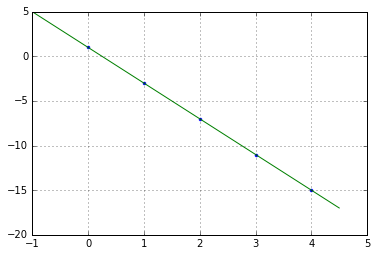

In [1]:
% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

X = np.array([0, 1, 2, 3, 4])
Y = np.array([0.98, -3.01, -6.99, -11.01, -15.0])

# Calcula os elementos das marizes
a11 = np.sum(X**2)
a12 = np.sum(X)
a22 = len(X)
b1 = np.sum(X * Y)
b2 = np.sum(Y)

# Monta e resolve o sistema
A = np.array([[a11, a12], [a12, a22]])

B = np.array([b1,b2])

a = solve(A, B)
print (a)

# define a funcao g(x) para plotar 
g = lambda x: a[0]*x+a[1]

# cria pontos (x, y) da reta 
Xr = np.arange(-1, 5, 0.5)

# Plota os pontos e a reta
plt.plot(X, Y, ".", Xr, g(Xr), "-") 
plt.grid()
plt.show()




Para aproximar a função f(x) por um polinômio de grau 2, usamos a seguinte forma geral para $g(x)$

$$ g(x)=a_1g_1(x) + a_2g_2(x) + a_3g_3(x) = a_1x^2 + a_2x + a_3$$

com $g_1(x) = x^2$, $g_2(x) = x$ e $g_3(x) = 1$.


$$ E(a_1, a_2, a_3)= \sum_{i=1}^{m} [g(x_i)-f(x_i)]^2 $$

Procuramos o ponto de mínimo, em que as derivadas parciais são nulas, ou seja

$$ \frac{\partial E}{\partial a_1} = 0\,\,\, ,  \,\,\,  \frac{\partial E}{\partial a_2} = 0 \,\,\, e \,\,\,  \frac{\partial E}{\partial a_3} = 0$$ 

Derivando $ E(a_1, a_2, a_3)$ em relação a $a_1$, $a_2$ e $a_3$ obtemos

$$ \frac{\partial E}{\partial a_1} = \frac{\partial}{\partial a_1} \left[ \sum_{i=1}^{m}\left(g(x_i)-f(x_i) \right)^2 \right]=0$$


ou

$$ \frac{\partial E}{\partial a_1} = \frac{\partial}{\partial a_1} \left\{\left[ \left(\sum_{i=1}^{m} a_1 x_i^2
 +  a_2x_i + a_3\right) - \left(\sum_{i=1}^{m} f(x_i) \right)\right]^2 \right\}=0$$
 
ou, ainda
 
$$ \frac{\partial E}{\partial a_1} =   2 \left[a_1\sum_{i=1}^{m} x_i^4 + a_2\sum_{i=1}^{m} x_i^3 + a_3\sum_{i=1}^{m} x_i^2   \right] - 2 \left[\sum_{i=1}^{m} f(x_i)x_i^2 \right] =0$$ 

analogamente, derivando em relação a $a_2$ 

$$ \frac{\partial E}{\partial a_2} =   2 \left[a_1\sum_{i=1}^{m} x_i^3 +  a_2\sum_{i=1}^{m} x_i^2 + a_3\sum_{i=1}^{m} x_i \right] - 2\left[\sum_{i=1}^{m} f(x_i) x_i \right] =0$$ 

e em relação a $a_3$

$$ \frac{\partial E}{\partial a_3} =   2 \left[a_1\sum_{i=1}^{m} x_i^2 +  a_2\sum_{i=1}^{m} x_i + ma_3 \right] - 2\left[\sum_{i=1}^{m} f(x_i)\right] =0$$ 


Assim, as equações obtidas nos permitem montar um sistema linear cuja solução dará os coeficientes $a_1$, $a_2$ e $a_3$ procurados

$$ \begin{cases} 
              \left(\sum_{i=1}^{m} x_i^4\right)a_1 + \left(\sum_{i=1}^{m} x_i^3\right)a_2 +\left(\sum_{i=1}^{m} x_i^2\right)a_3  = \sum_{i=1}^{m} f(x_i)x_i^2  \\ 
              \\
	         \left(\sum_{i=1}^{m} x_i^3\right)a_1 + \left(\sum_{i=1}^{m} x_i^2\right)a_2 + \left(\sum_{i=1}^{m} x_i\right)a_3 = \sum_{i=1}^{m} f(x_i)x_i  \\
             \\
             \left(\sum_{i=1}^{m} x_i^2\right)a_ 1 + \left(\sum_{i=1}^{m} x_i\right)a_ 2 + \left(\sum_{i=1}^{m} 1\right)a_ 3  = \sum_{i=1}^{m} f(x_i)
   \end{cases} $$











### Exemplo
p184

[ 5.08982143  0.05189286 -1.14371429]


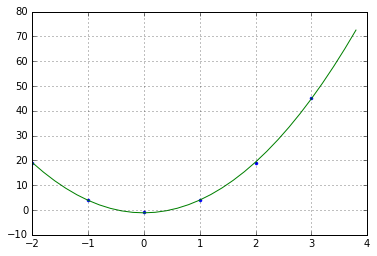

In [2]:
% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

X = np.array([-2., -1., 0, 1., 2., 3.])
Y = np.array([19.01, 3.99, -1.00, 4.01, 18.99, 45.00])

# Calcula os elementos das marizes
A11 = np.sum(X**4)
A12 = np.sum(X**3)
A13 = np.sum(X**2)
A23 = np.sum(X)
A33 = len(X)
B1 = np.sum(X**2*Y) 
B2 = np.sum(X*Y)
B3 = np.sum(Y)

# Monta e resolve o sistema
A = np.array([[A11,A12, A13],[A12, A13, A23], [A13, A23, A33]])
B = np.array([B1,B2,B3])
a = solve(A, B)
print (a)

# define a funcao g(x) para plotar 
g = lambda x: a[0]*x*x+a[1]*x+a[2]

# cria pontos (x, y) da reta 
Xr = np.arange(X[0], X[-1]+1, 0.2)
Yr = []
for x in Xr:
    Yr.append(g(x))    

# Plota os pontos e a reta
plt.plot(X, Y, ".", Xr, Yr, "-") 
plt.grid()
plt.show()


Generalizando o procedimento, podemos determinar os coeficientes $a_1,a_2,...,a_n$ da função$ g(x) = a_1g_1(x)+a_1g_1(x)+...+a_ng_n(x)$ resolvendo o sistema linear formado pelas equações 

$$ \frac{\partial E}{\partial a_1} = 0, \,\,  \frac{\partial E}{\partial a_2} = 0, ..., \,\, \frac{\partial E}{\partial a_n} = 0$$ 

ou seja, 

$$ \begin{cases} 
\left(\sum_{i=1}^{m} g_1(x_i)g_1(x_i)\right)a_1 + \left(\sum_{i=1}^{m} g_1(x_i)g_2(x_i)\right)a_2+...+\left(\sum_{i=1}^{m} g_1(x_i)g_n(x_i)\right)a_n = \sum_{i=1}^{m} f(x_i)g_1(x_i) \\
\left(\sum_{i=1}^{m} g_2(x_i)g_1(x_i)\right)a_1 + \left(\sum_{i=1}^{m} g_2(x_i)g_2(x_i)\right)a_2+...+\left(\sum_{i=1}^{m} g_2(x_i)g_n(x_i)\right)a_n = \sum_{i=1}^{m} f(x_i)g_2(x_i) \\
\vdots\\
\left(\sum_{i=1}^{m} g_n(x_i)g_1(x_i)\right)a_1 + \left(\sum_{i=1}^{m} g_n(x_i)g_2(x_i)\right)a_2+...+\left(\sum_{i=1}^{m} g_n(x_i)g_n(x_i)\right)a_n = \sum_{i=1}^{m} f(x_i)g_n(x_i) \\
\end{cases} $$



## Caso contínuo

No caso da função $f(x)$ ser conhecida, podemos ajustar a função $g(x)$ de modo a minimizar 

$$ E = \int_a^b [e(x)]^2 dx = \int_a^b [f(x)-g(x)]^2 dx$$

o que leva a necessidade de resolução do sistema linear

$$\left[\begin{array}{cccc}
	         \langle g_1,g_1 \rangle &\langle g_1,g_2 \rangle &... &\langle g_1,g_n \rangle\\ 
	         \langle g_2,g_1 \rangle &\langle g_2,g_2 \rangle &... &\langle g_2,g_n \rangle\\  
             \vdots \\
             \langle g_n,g_1 \rangle &\langle g_n,g_2 \rangle &... &\langle g_n,g_n \rangle\\ 
	    \end{array} \right]
\left[\begin{array}{c} 
	         a_1 \\ 
	         a_2 \\
             \vdots \\
             a_n
	  \end{array} \right]
=
\left[\begin{array}{c} 
	         \langle f,g_1 \rangle \\ 
	         \langle f,g_2 \rangle \\ 
             \vdots \\
             \langle f,g_n \rangle \\ 
	  \end{array} \right] 
             $$
             
Com $\langle f,g \rangle$ sendo o produto escalar entre as funções $f$ e $g$, definido como 

$$ \langle f,g \rangle = \int_a^b f(x)g(x)dx$$

### Exemplo 
p190

[-0.59854891  0.17695201]


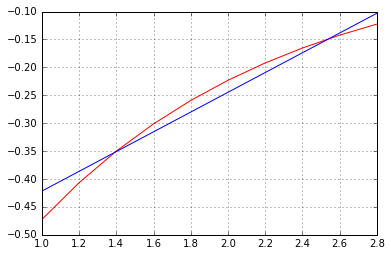

In [4]:
% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
from scipy.integrate import quad
import math
from numpy import exp

g1g1 = lambda x: 1
g1g2 = lambda x: x
g2g2 = lambda x: x**2
fg1 = lambda x: -math.exp(-0.75*x)
fg2 = lambda x: -x*math.exp(-0.75*x)




# Calcula os elementos das marizes
a11 = quad(g1g1, 1, 3)[0]
a12 = quad(g1g2, 1, 3)[0]
a22 = quad(g2g2, 1, 3)[0]
b1 = quad(fg1, 1, 3)[0]
b2 = quad(fg2, 1, 3)[0]



# Monta e resolve o sistema
A = np.array([[a11, a12], [a12, a22]])

B = np.array([b1,b2])

a = solve(A, B)
print (a)

# define a funcao g(x) para plotar 
g = lambda x: a[0]+a[1]*x

# cria pontos (x, y) da reta 
Xr = np.arange(1, 3, 0.2)
#print (Xr)

#Y = np.exp(X)

# Plota os pontos e a reta
plt.plot(Xr, -np.exp(-0.75*Xr), "r-", Xr, g(Xr), "b-") 
plt.grid()
plt.show()